In [17]:
# importing libraries
import tensorflow as tf
import numpy as np
from tensorflow.keras.callbacks import Callback
from keras.preprocessing.image import ImageDataGenerator

## Pre-processing the data

### Cropping images (if needed)

In [46]:
from PIL import Image
import os
import glob

path_main ='C:\\Users\\Olia\\Desktop\\Lips Reading\\Day3\\Data(audios)\\Test_Data_Spectogram_trimmed' #CHANGE
folders = os.listdir(path_main)
folders

for folder in folders:
    path = path_main + fr'\{folder}'
    os.chdir(path)
    images = glob.glob("*.*") # CHECK the FORMAT
    #print(path.split(r'\')[])
    for image in images:
        
        # Open the image file
        im = Image.open(path + f'\{image}')
        width, height = im.size

        # Define the trim box
        left = width * 0.15
        right = width * 0.9
        top = height * 0.15
        bottom = height * 0.8

        # Crop the image
        im = im.crop((left, top, right, bottom))
        im.save(path + f'\{image}')

### Prepare train data

In [29]:
# path to the folders with spectrograms of train data
train_data_path = (r'C:\Users\Olia\Desktop\Lips Reading\Day3\Train_data_unified')#(r'C:\Users\Olia\Desktop\Lips Reading\Day3\Data(audios)\Train_Data_Spectogram_trimmed')

In [19]:
# loading and pre-processing the tain data 
train_data = tf.keras.utils.image_dataset_from_directory(train_data_path,
                                                         #batch_size=100, 
                                                         label_mode='categorical', 
                                                         image_size=(256, 256), 
                                                         labels='inferred', 
                                                         class_names=['angry', 'disgust', 'fearful', 'happy', 'neutral', 'sad', 'surprised'])
train_data

Found 1400 files belonging to 7 classes.


<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 7), dtype=tf.float32, name=None))>

In [20]:
train_data.class_names

['angry', 'disgust', 'fearful', 'happy', 'neutral', 'sad', 'surprised']

In [21]:
# extracting 
train_images = np.concatenate([x for x, y in train_data], axis=0)

train_labels = np.concatenate([y for x, y in train_data], axis=0) 

### Prepare test data

In [7]:
test_data_path = (r'C:\Users\Olia\Desktop\Lips Reading\Day3\Data(audios)\Test_Data_Spectogram_trimmed')

In [22]:
# loading and pre-processing the test data 
test_data = tf.keras.utils.image_dataset_from_directory(test_data_path, batch_size=100, label_mode='categorical', image_size=(256, 256), labels='inferred', class_names=['angry', 'disgust', 'fearful', 'happy', 'neutral', 'sad', 'surprised'])
test_data

Found 84 files belonging to 7 classes.


<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 7), dtype=tf.float32, name=None))>

In [23]:
# extracting test_images and test_labels
test_images = np.concatenate([x for x, y in test_data], axis=0) 

test_labels = np.concatenate([y for x, y in test_data], axis=0) 

### Data **augmentation**

In [31]:
train_datagen = ImageDataGenerator(     # here we use the ImageDataGenerator
      #rescale=1./255,
      #rotation_range=40,
      #width_shift_range=0.2,                # Applaying these all Data Augmentations
      #height_shift_range=0.2,
      #shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

##train_datagen.fit(train_images)

test_datagen = ImageDataGenerator()#(rescale=1./255)

##train_datagen.fit(test_images)
# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        train_data_path,  # this is the target directory
        target_size=(256, 256),  # all images will be resized 
        batch_size=20,
        class_mode="categorical",
        shuffle=True,
        seed=42)#,
        #save_to_dir=r'C:\Users\Olia\Desktop\Lips Reading\Day5(Video+Audio_camera, CPU)\CNN_Checkpoints',
        #save_prefix='aug') 

# this is a similar generator, for validation data
test_generator = test_datagen.flow_from_directory(
        test_data_path,
        target_size=(256, 256),
        batch_size=20,
        class_mode="categorical",
        shuffle=True,
        seed=42)



Found 2564 images belonging to 7 classes.
Found 84 images belonging to 7 classes.


In [16]:
train_datagen

In [ ]:
"""train_data_gen = image_gen_train.flow_from_directory(batch_size=50,     # Batch siz emeans at a time it takes 100
                                                     directory=train_data_path,    # Here we put shuffle= True so tat model doesnt memorise order
                                                     shuffle=True,
                                                     target_size=(256, 256),
                                                     class_mode="categorical")"""

## Training the model

In [33]:
# create a checkpoint for saving the best performing epoch
checkpoint_filepath = r'C:\Users\Olia\Desktop\Lips Reading\Day5(Video+Audio_camera, CPU)\CNN_Checkpoints'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [ ]:
#C:\Users\Olia\Desktop\Lips Reading\Day3\Toronto_Spectrograms

In [35]:

# Create the model
model = tf.keras.Sequential([
    #tf.keras.layers.Input(shape=(256, 256)),
    tf.keras.layers.Rescaling(1./255, input_shape=(256, 256, 3)),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (4, 4), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(16, (4, 4), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    #tf.keras.layers.Dropout(rate=0.3, seed=15),
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(1000, activation='relu'),
    #tf.keras.layers.Dropout(rate=0.2, seed=15),
    tf.keras.layers.Dense(500, activation='relu'),
    #tf.keras.layers.Dropout(rate=0.2, seed=15),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(30, activation='sigmoid'),
    tf.keras.layers.Dense(7, activation='softmax')
    
])

# Compile the model

#variant unu
from keras.optimizers import SGD
opt = SGD(lr=1e-5)
model.compile(loss = "categorical_crossentropy", optimizer = opt, metrics=['accuracy'])

#variant doi
##model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator,
                    #train_images, train_labels, 
                    epochs=50,
                    steps_per_epoch=40,
                    #batch_size=50, 
                    shuffle=True, 
                    callbacks=[model_checkpoint_callback],
                    validation_data=test_generator)#(test_images, test_labels))

Epoch 1/50
40/40 [==============================] - ETA: 0s - loss: 2.0127 - accuracy: 0.1454

INFO:tensorflow:Assets written to: C:\Users\Olia\Desktop\Lips Reading\Day5(Video+Audio_camera, CPU)\CNN_Checkpoints\assets


INFO:tensorflow:Assets written to: C:\Users\Olia\Desktop\Lips Reading\Day5(Video+Audio_camera, CPU)\CNN_Checkpoints\assets


40/40 [==============================] - 267s 7s/step - loss: 2.0127 - accuracy: 0.1454 - val_loss: 2.0332 - val_accuracy: 0.1429
Epoch 2/50
40/40 [==============================] - 269s 7s/step - loss: 2.0022 - accuracy: 0.1562 - val_loss: 2.0331 - val_accuracy: 0.1429
Epoch 3/50
40/40 [==============================] - 262s 7s/step - loss: 2.0231 - accuracy: 0.1441 - val_loss: 2.0330 - val_accuracy: 0.1429
Epoch 4/50
40/40 [==============================] - 268s 7s/step - loss: 2.0217 - accuracy: 0.1462 - val_loss: 2.0329 - val_accuracy: 0.1429
Epoch 5/50
40/40 [==============================] - 261s 7s/step - loss: 2.0179 - accuracy: 0.1403 - val_loss: 2.0329 - val_accuracy: 0.1429
Epoch 6/50
40/40 [==============================] - 266s 7s/step - loss: 2.0177 - accuracy: 0.1462 - val_loss: 2.0328 - val_accuracy: 0.1429
Epoch 7/50
40/40 [==============================] - 261s 7s/step - loss: 2.0282 - accuracy: 0.1454 - val_loss: 2.0327 - val_accuracy: 0.1429
Epoch 8/50
40/40 [======

## Evaluate the model

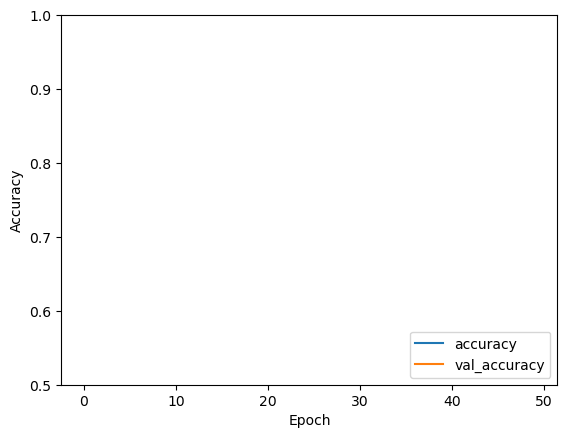

In [38]:
#plotting the model's performance
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [37]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

3/3 - 5s - loss: 2.0290 - accuracy: 0.1429 - 5s/epoch - 2s/step
0.1428571492433548


## Prediction

In [39]:
#predict the emotion
image = tf.keras.utils.load_img(r'C:\Users\Olia\Desktop\03-01-05-01-01-01-12.jpeg', target_size=(256, 256)) #YOUR IMAGE PSATH
input_arr = tf.keras.utils.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = model.predict(input_arr)
predictions

1/1 [==============================] - 0s 258ms/step


array([[0.14437829, 0.26099533, 0.17664614, 0.07505419, 0.09884663,
        0.08808781, 0.15599158]], dtype=float32)

In [40]:
max_index = np.argmax(predictions)
max_index

1

## Decoding the ptredicted label

In [ ]:
# Define a sample one-hot encoding
##onehot_encoded = np.array(["PREDICTION"]) #[1, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 1]])

# Get the indices where the values are 1
##index_of_max = np.argmax(onehot_encoded, axis=1)

# Create a list of labels to match the indices
labels = ['angry', 'disgust', 'fearful', 'happy', 'neutral', 'sad', 'surprised']

# Use the indices to get the labels
decoded_labels = [labels[max_index]]# for index in index_of_max]

# The decoded labels
print(decoded_labels)

['disgust']


## Save the model

In [ ]:
model.save("Dummy_CNN.h5")

In [43]:
# save the model with pickle
import pickle
filename = 'CNN_model.sav'
pickle.dump(model, open(filename, 'wb'))
# loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded_model.predict([text])[0]
# print(result)
#pickle.dump(pipe_lr, open('/content/gdrive/MyDrive/From Motion to Emotion/emo_text_model.sav' , 'wb'))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\conv2d
......vars
.........0
.........1
...layers\conv2d_1
......vars
.........0
.........1
...layers\conv2d_2
......vars
.........0
.........1
...layers\conv2d_3
......vars
.........0
.........1
...layers\conv2d_4
......vars
.........0
.........1
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dense_3
......vars
.........0
.........1
...layers\dense_4
......vars
.........0
.........1
...layers\flatten
......vars
...layers\max_pooling2d
......vars
...layers\max_pooling2d_1
......vars
...layers\max_pooling2d_2
......vars
...layers\max_pooling2d_3
......vars
...layers\max_pooling2d_4
......vars
...layers\rescaling
......vars
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...vars
Keras model archive saving:
File Name                      